# Прогнозирование содержания водорослей

Используем в качестве примера для дальнейших упражнений таблицу, содержащую данные гидробиологических исследований обилия водорослей в различных реках. Каждое из наблюденийсодержит информацию  о 18 переменных, в том числе:

+ три номинальных переменных, описывающих размеры size = c("large", "medium", "small") и скорость течения реки speed = c("high", "low", "medium"), а также время года season = c("autumn", "spring", "summer", "winter"), сопряженное с моментом взятия проб;
+ 8 переменных, составляющих комплекс наблюдаемых гидрохимических показателей: максимальное значение рН mxPH , минимальное содержание кислорода mnO2 , хлориды Cl , нитраты NO3 , ионы аммония NH4, орто-фосфаты oPO4 , общий минеральный фосфор PO4 и количество хлорофилла а Chla;
+ средняя численность каждой из 7 групп водорослей a1 - a7 (видовой состав не идентифицировался).


Нашей задачей будет научиться предсказывать численность хотя бы одной из групп водорослей


### **0. Импорт необходимых пакетов**

In [1]:
import pandas as pd
import numpy as np

# нам понадобится отрисовка графиков

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### **1. Загрузка данных**



In [2]:
df = pd.read_csv('analysisdata.csv', sep = ',', header = None, 
                   names = ['season','size','speed','mxPH','mnO2','Cl',
                            'NO3','NH4','oPO4','PO4','Chla','a1','a2','a3','a4',
                            'a5','a6','a7'])


### 2. Небольшая предобработка данных

Посмотрим, все ли мы правильно скачали

In [3]:
df.head()

,season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
0,winter,small_,medium,8.00000,9.80000,60.80000,6.23800,578.00000,105.00000,170.00000,50.00000,0.0,0.0,0.0,0.0,34.2,8.3,0.0
1,spring,small_,medium,8.35000,8.00000,57.75000,1.28800,370.00000,428.75000,558.75000,1.30000,1.4,7.6,4.8,1.9,6.7,0.0,2.1
2,autumn,small_,medium,8.10000,11.40000,40.02000,5.33000,346.66699,125.66700,187.05701,15.60000,3.3,53.6,1.9,0.0,0.0,0.0,9.7
3,spring,small_,medium,8.07000,4.80000,77.36400,2.30200,98.18200,61.18200,138.70000,1.40000,3.1,41.0,18.9,0.0,1.4,0.0,1.4
4,autumn,small_,medium,8.06000,9.00000,55.35000,10.41600,233.70000,58.22200,97.58000,10.50000,9.2,2.9,7.5,0.0,7.5,4.1,1.0


In [4]:
df.describe()

,a1,a2,a3,a4,a5,a6,a7
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,316.000000
mean,16.861862,6.933634,4.216216,1.631532,5.919520,6.033634,2.177532
std,21.123350,10.669414,6.837550,3.399698,9.813241,11.385491,5.037671
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.600000,2.100000,1.500000,0.000000,2.200000,0.000000,0.000000
75%,25.100000,8.900000,5.400000,2.200000,8.100000,6.800000,2.200000
max,89.800000,72.600000,44.600000,35.600000,77.600000,70.700000,31.600000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  333 non-null    object 
 1   size    333 non-null    object 
 2   speed   333 non-null    object 
 3   mxPH    333 non-null    object 
 4   mnO2    333 non-null    object 
 5   Cl      333 non-null    object 
 6   NO3     333 non-null    object 
 7   NH4     333 non-null    object 
 8   oPO4    333 non-null    object 
 9   PO4     333 non-null    object 
 10  Chla    333 non-null    object 
 11  a1      333 non-null    float64
 12  a2      333 non-null    float64
 13  a3      333 non-null    float64
 14  a4      333 non-null    float64
 15  a5      333 non-null    float64
 16  a6      333 non-null    float64
 17  a7      316 non-null    float64
dtypes: float64(7), object(11)
memory usage: 47.0+ KB


Практически все признаки у нас типа object. Надо привести их к числовому формату

**Перекодируем пропуски**

In [6]:
df.loc[df['mxPH']=='XXXXXXX', 'mxPH'] = np.nan
df.loc[df['mnO2']=='XXXXXXX', 'mnO2'] = np.nan
df.loc[df['Cl']=='XXXXXXX', 'Cl'] = np.nan
df.loc[df['NO3']=='XXXXXXX', 'NO3'] = np.nan
df.loc[df['NO3']=='XXXXXXX', 'NO3'] = np.nan
df.loc[df['NH4']=='XXXXXXX', 'NH4'] = np.nan
df.loc[df['oPO4']=='XXXXXXX', 'oPO4'] = np.nan
df.loc[df['PO4']=='XXXXXXX', 'PO4'] = np.nan
df.loc[df['Chla']=='XXXXXXX', 'Chla'] = np.nan

In [7]:
# приведение к числовому формату
df['mxPH']= df['mxPH'].astype('float')
df['mnO2']= df['mnO2'].astype('float')
df['Cl']= df['Cl'].astype('float')
df['NO3']= df['NO3'].astype('float')
df['NH4']= df['NH4'].astype('float')
df['oPO4']= df['oPO4'].astype('float')
df['PO4']= df['PO4'].astype('float')
df['Chla']= df['Chla'].astype('float')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  333 non-null    object 
 1   size    333 non-null    object 
 2   speed   333 non-null    object 
 3   mxPH    331 non-null    float64
 4   mnO2    331 non-null    float64
 5   Cl      317 non-null    float64
 6   NO3     331 non-null    float64
 7   NH4     331 non-null    float64
 8   oPO4    331 non-null    float64
 9   PO4     326 non-null    float64
 10  Chla    310 non-null    float64
 11  a1      333 non-null    float64
 12  a2      333 non-null    float64
 13  a3      333 non-null    float64
 14  a4      333 non-null    float64
 15  a5      333 non-null    float64
 16  a6      333 non-null    float64
 17  a7      316 non-null    float64
dtypes: float64(15), object(3)
memory usage: 47.0+ KB


In [9]:
df.describe()

,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
count,331.000000,331.000000,317.000000,331.000000,331.000000,331.000000,326.000000,310.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,316.000000
mean,7.998384,9.192961,42.356261,3.128946,162.791517,72.561674,112.597638,12.586829,16.861862,6.933634,4.216216,1.631532,5.919520,6.033634,2.177532
std,0.584159,2.296167,44.848868,3.303178,186.208544,101.666933,101.092140,18.121411,21.123350,10.669414,6.837550,3.399698,9.813241,11.385491,5.037671
min,5.600000,1.500000,0.222000,0.000000,5.000000,1.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.730000,8.000000,10.936000,1.176000,34.666500,13.000000,22.600000,2.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.060000,9.800000,32.400000,2.363000,101.250000,37.000000,84.500000,4.850000,7.600000,2.100000,1.500000,0.000000,2.200000,0.000000,0.000000
75%,8.400000,10.800000,57.500000,4.179000,212.706495,86.050000,174.479007,17.312500,25.100000,8.900000,5.400000,2.200000,8.100000,6.800000,2.200000
max,9.700000,13.400000,391.500000,45.650002,931.833010,771.599980,558.750000,110.456000,89.800000,72.600000,44.600000,35.600000,77.600000,70.700000,31.600000


Пока что выкинем a7 из рассмотрения

In [10]:
df.drop(['a7'], axis=1, inplace=True)

### **3. Простейшие модели без настройки параметров**


Посмотрим, что будет, если мы особо не напрягаясь, просто удалим все пропуски, забудем про категориальные переменные и попробуем построить линейную регрессию прогнозирования признака 'a4' просто на всех оставшихся данных

In [11]:
df_first = df.dropna()
df_first.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 332
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  299 non-null    object 
 1   size    299 non-null    object 
 2   speed   299 non-null    object 
 3   mxPH    299 non-null    float64
 4   mnO2    299 non-null    float64
 5   Cl      299 non-null    float64
 6   NO3     299 non-null    float64
 7   NH4     299 non-null    float64
 8   oPO4    299 non-null    float64
 9   PO4     299 non-null    float64
 10  Chla    299 non-null    float64
 11  a1      299 non-null    float64
 12  a2      299 non-null    float64
 13  a3      299 non-null    float64
 14  a4      299 non-null    float64
 15  a5      299 non-null    float64
 16  a6      299 non-null    float64
dtypes: float64(14), object(3)
memory usage: 42.0+ KB


In [12]:
y = df_first['a1']
X = df_first.drop(['a1','season','size', 'speed'], axis=1)

**Разделение данных**

Разделим данные на тестовую и обучающую выборку (70% к 30%)

In [13]:
# подгрузим необходимые пакеты.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

**Что будет если мы просто предскажем средним значением?**

In [14]:
from sklearn.metrics import r2_score, mean_squared_error
pred =  [y_train.mean() for i in range(len(y_test))]

print("Правильность на константном наборе R^2: {:.2f}".format(r2_score(y_test, pred )))
print("СКО на тестовом наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_test, pred))))

# ничего хорошего

Правильность на константном наборе R^2: -0.00
СКО на тестовом наборе: 20.53


**Линейная регрессия**

In [15]:
# Задаем модель lr, с помощью функции fit обучаем ее на тренировочных данных
lr = LinearRegression()
lr.fit(X_train, y_train)

print("Веса регрессии:",  lr.coef_ )
print("Свободное слагаемое: {:.2f}".format(lr.intercept_))

Веса регрессии: [ 1.32131778e+00  7.88598441e-01 -3.96408849e-02 -4.96777119e-01
 -4.22967930e-04 -2.91395153e-02 -2.56920542e-02 -1.85090364e-01
 -3.60262386e-01 -3.67929427e-01 -6.00002242e-01 -1.87145833e-01
 -3.67662633e-01]
Свободное слагаемое: 16.63


**Посмотрим, на сколько хорошая самая первая примитивная модель**

In [16]:
# Загрузим соответствующие метрики
from sklearn.metrics import r2_score, mean_squared_error

# Спрогнозируем для тестовых и тренировочных данных

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Вывод результата
print("Правильность на обучающем наборе R^2: {:.2f}".format(r2_score(y_train, y_train_pred)))
print("СКО на обучающем наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print("Правильность на тестовом наборе R^2: {:.2f}".format(r2_score(y_test, y_test_pred)))
print("СКО на тестовом наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

Правильность на обучающем наборе R^2: 0.43
СКО на обучающем наборе: 14.23
Правильность на тестовом наборе R^2: 0.35
СКО на тестовом наборе: 16.58


In [17]:
data = pd.concat([X_train, X_test], ignore_index = True)

In [18]:
data['a7'] = data['a2']+data['a4']

In [19]:
data

,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a2,a3,a4,a5,a6,a7
0,8.30,8.6,75.00000,5.180000,560.00000,30.50000,170.00000,16.700,1.5,0.0,0.0,14.1,70.7,1.5
1,7.40,9.8,11.00000,3.235000,255.00000,38.75000,56.66700,2.000,0.0,0.0,4.6,6.5,2.2,4.6
2,8.90,8.0,60.20000,4.033000,306.47101,136.00000,242.94099,18.400,7.7,0.0,0.0,11.6,54.3,7.7
3,8.10,10.5,22.28600,4.071000,178.57001,182.42000,255.28000,8.957,2.7,1.0,3.7,2.7,0.0,6.4
4,7.78,12.0,7.00000,1.420000,34.33300,18.66700,50.00000,1.100,0.0,0.0,1.2,0.0,0.0,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,7.80,6.5,64.09300,7.740002,47.50000,276.00000,8.10000,6.500,0.0,7.7,9.9,18.2,7.0,9.9
295,7.50,10.8,31.00000,4.408000,737.50000,111.25000,214.00000,2.900,0.0,0.0,5.0,1.9,6.2,5.0
296,7.55,11.5,4.70000,1.320000,14.75000,4.25000,98.25000,1.100,0.0,1.7,0.0,0.0,0.0,0.0
297,7.70,10.2,8.00000,1.527000,21.57100,12.75000,20.75000,0.800,0.0,0.0,0.0,1.2,0.0,0.0


**Как мы видим, качество не очень хорошее. Но лезть и что-то менять в данных нам все еще лень и мы пытаемся исхитриться дальше** 

### 0. Полиномиальная регрессия
Можем попробовать применить полиномиальную регрессию соответствующей степени

In [22]:
# Загрузка соответствующего пакета
from sklearn.preprocessing import PolynomialFeatures


# превратили каждый признак в два - он, квадрат и куб, и их возможные комбинации
polynomial_features= PolynomialFeatures(degree=3)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)


In [23]:
# Обучим модель на новых данных

model = LinearRegression()
model.fit(X_train_poly, y_train)

y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)
print("Правильность на обучающем наборе R^2: {:.2f}".format(r2_score(y_train, y_train_pred)))
print("СКО на обучающем наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print("Правильность на тестовом наборе R^2: {:.2f}".format(r2_score(y_test, y_test_pred)))
print("СКО на тестовом наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

Правильность на обучающем наборе R^2: 1.00
СКО на обучающем наборе: 0.00
Правильность на тестовом наборе R^2: -11150326.05
СКО на тестовом наборе: 68397.94


**Мы очень сильно переобучились( Количество переменных стало слишком большим для такого маленького набора данных.
Но можно будет попробовать сделать это с каким-то конкретным признаком. Либо воспользоваться гребневой или лассо регрессией**

### 1. Гребневая регрессия



In [24]:
# загружаем функцию гребневой регрессии
from sklearn.linear_model import Ridge

# Обучаем модель
ridge = Ridge() # по умолчанию альфа = 1
ridge.fit(X_train_poly, y_train)

# Результаты работы модели
y_train_pred = ridge.predict(X_train_poly)
y_test_pred = ridge.predict(X_test_poly)
print("Правильность на обучающем наборе R^2: {:.2f}".format(r2_score(y_train, y_train_pred)))
print("СКО на обучающем наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print("Правильность на тестовом наборе R^2: {:.2f}".format(r2_score(y_test, y_test_pred)))
print("СКО на тестовом наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))


Правильность на обучающем наборе R^2: 1.00
СКО на обучающем наборе: 0.07
Правильность на тестовом наборе R^2: -11147848.48
СКО на тестовом наборе: 68390.34


Все еще плохо. Увеличим альфа

In [25]:
ridge10 = Ridge(alpha=100).fit(X_train_poly, y_train)
ridge10.fit(X_train_poly, y_train)
y_train_pred = ridge10.predict(X_train_poly)
y_test_pred = ridge10.predict(X_test_poly)
print("Правильность на обучающем наборе R^2: {:.2f}".format(r2_score(y_train, y_train_pred)))
print("СКО на обучающем наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print("Правильность на тестовом наборе R^2: {:.2f}".format(r2_score(y_test, y_test_pred)))
print("СКО на тестовом наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))


Правильность на обучающем наборе R^2: 1.00
СКО на обучающем наборе: 0.09
Правильность на тестовом наборе R^2: -10890051.64
СКО на тестовом наборе: 67594.95


In [27]:
ridge10 = Ridge(alpha=100).fit(X_train_poly, y_train)
ridge10.fit(X_train_poly, y_train)
y_train_pred = ridge10.predict(X_train_poly)
y_test_pred = ridge10.predict(X_test_poly)
print("Правильность на обучающем наборе R^2: {:.2f}".format(r2_score(y_train, y_train_pred)))
print("СКО на обучающем наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print("Правильность на тестовом наборе R^2: {:.2f}".format(r2_score(y_test, y_test_pred)))
print("СКО на тестовом наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))


Правильность на обучающем наборе R^2: 1.00
СКО на обучающем наборе: 0.06
Правильность на тестовом наборе R^2: -11145209.93
СКО на тестовом наборе: 68382.25


Все равно плохо. Признаков слишком много. Поэтому есть предложение воспользоваться Lasso регрессией. Одной из ее особенностей как раз является зануление параметров

### 2. Lasso

In [28]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 10) # по умолчанию альфа = 1
lasso.fit(X_train_poly, y_train)
print("Количество использованных признаков: {}".format(np.sum(lasso.coef_ != 0)))

y_train_pred = lasso.predict(X_train_poly)
y_test_pred = lasso.predict(X_test_poly)
print("Правильность на обучающем наборе R^2: {:.2f}".format(r2_score(y_train, y_train_pred)))
print("СКО на обучающем наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print("Правильность на тестовом наборе R^2: {:.2f}".format(r2_score(y_test, y_test_pred)))
print("СКО на тестовом наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))


Количество использованных признаков: 404
Правильность на обучающем наборе R^2: 0.87
СКО на обучающем наборе: 6.90
Правильность на тестовом наборе R^2: -200.64
СКО на тестовом наборе: 290.86


#### Попробуем подобрать параметр альфа с помощью метода кросс-валидации

In [29]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

In [30]:
from sklearn.linear_model import Lasso

lasso_params = {
    'alpha': np.arange(1,2000, 10)
}
kf = KFold(random_state = 42, shuffle = True, n_splits = 3)

ls = Lasso()
lasso_grid = GridSearchCV(ls, lasso_params, cv=kf, n_jobs=-1, scoring='r2')
# смотрим, что у нас будет на нашей решетке на тренировочных данных
lasso_grid.fit(X_train_poly, y_train)

print(lasso_grid.best_params_, lasso_grid.best_score_)

{'alpha': 1991} -12.324846623442403


**Видим, что ничего хорошего у нас не получается даже при кросс валидации. Поэтому попробуем покопаться в самих данных. Может там особо ничего и нельзя сделать(**

## Задание 1.
### Полное исследование данных.

**0. Выведите основные описательные статистики для наших признаков**

In [34]:
df = pd.read_csv('analysisdata.csv', sep = ',', header = None, 
                   names = ['season','size','speed','mxPH','mnO2','Cl',
                            'NO3','NH4','oPO4','PO4','Chla','a1','a2','a3','a4',
                            'a5','a6','a7'])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   season  333 non-null    object 
 1   size    333 non-null    object 
 2   speed   333 non-null    object 
 3   mxPH    333 non-null    object 
 4   mnO2    333 non-null    object 
 5   Cl      333 non-null    object 
 6   NO3     333 non-null    object 
 7   NH4     333 non-null    object 
 8   oPO4    333 non-null    object 
 9   PO4     333 non-null    object 
 10  Chla    333 non-null    object 
 11  a1      333 non-null    float64
 12  a2      333 non-null    float64
 13  a3      333 non-null    float64
 14  a4      333 non-null    float64
 15  a5      333 non-null    float64
 16  a6      333 non-null    float64
 17  a7      316 non-null    float64
dtypes: float64(7), object(11)
memory usage: 47.0+ KB


In [36]:
df.loc[df['mxPH']=='XXXXXXX', 'mxPH'] = np.nan
df.loc[df['mnO2']=='XXXXXXX', 'mnO2'] = np.nan
df.loc[df['Cl']=='XXXXXXX', 'Cl'] = np.nan
df.loc[df['NO3']=='XXXXXXX', 'NO3'] = np.nan
df.loc[df['NO3']=='XXXXXXX', 'NO3'] = np.nan
df.loc[df['NH4']=='XXXXXXX', 'NH4'] = np.nan
df.loc[df['oPO4']=='XXXXXXX', 'oPO4'] = np.nan
df.loc[df['PO4']=='XXXXXXX', 'PO4'] = np.nan
df.loc[df['Chla']=='XXXXXXX', 'Chla'] = np.nan

In [40]:
df.drop(['a7'], axis=1, inplace=True)

**1. На сколько группы водорослей скоррелированы друг с другом??**

Какие группы водорослей можно было бы использовать при построении модели регресси для группы а1?

<AxesSubplot:>

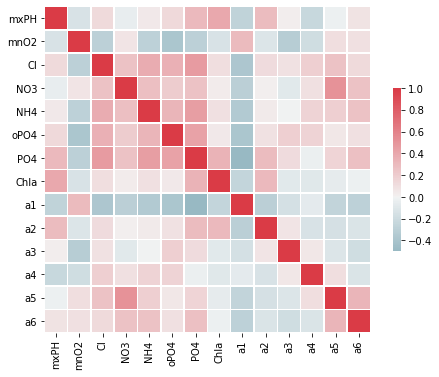

In [41]:
corr = df.corr()
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0., square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
df['mxPH']= df['mxPH'].astype('float')
df['mnO2']= df['mnO2'].astype('float')
df['Cl']= df['Cl'].astype('float')
df['NO3']= df['NO3'].astype('float')
df['NH4']= df['NH4'].astype('float')
df['oPO4']= df['oPO4'].astype('float')
df['PO4']= df['PO4'].astype('float')
df['Chla']= df['Chla'].astype('float')

In [ ]:
# ваш код здесь

In [ ]:
# ответ

**2. Постройте матрицу корреляций гидрохимических показателей + переменной a1**

In [ ]:
# ваш код здесь

<AxesSubplot:>

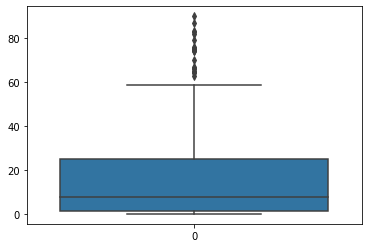

In [47]:
sns.boxplot(data=df.a1)

<span style="color:red">Какие из признаков сильнее всего скоррелированы? Возможно, стоит исключать некоторые из них при построении линейной регрессии. Но это не точно</span>

**3. Постройте ящик с усами. Есть ли различия в распределении переменных по сезону, размеру реки, скорости?** 

Так как при применении линейной регрессии данные должны быть однородными, посмотрим, есть ли влияние категориальных признаков на распределения основных признаков.

**a. концентрация фосфатов в зависимости от скорости, размера реки и сезона**

**b. количество хлорофилла в зависимости от скорости, размера реки и сезона**

Для наглядности иллюстрации зависимости от скорости задайте порядок на графике ( order=["low___", "medium", "high__"])

In [ ]:
# Ваш код здесь

<span style="color:red">Какие выводы вы можете сделать?</span>

### 4. Связь с целевой переменной. 

1. **Посмотрим, как зависит наша переменная a1 от максимального значения PH.**
2. **Посмотрим, как зависит наша переменная a1 от количества хлорофилла.**
3. **Посмотрим, как зависит наша переменная a1 от концентрации фосфатов.**

Постройте сначала графики для всех наблюдений. (с помощью функции jointplot)

<span style="color:red">Какие выводы вы можете сделать?</span>
    
<span style="color:red">C каким из признаков зависимость выражена сильнее? Каким еще образом это можно проверить?</span>

<span style="color:red">Сохраняется ли эта зависимость по сезонам?</span>
    
<span style="color:red">Посмотрите, если ли интересные особенности в распределении с другими признаками </span>

In [ ]:
# Ваш код здесь

## Задание 2.
**Попробуйте улучшить модель.**

**a. Выберите среди наиболее коррелируемых с целевой переменной 3-4 гидрохимических показателя (желательно, чтобы они были независимы, коэффициент корреляции не превосходит 0.5) + можно взять парочку переменных из групп водорослей.**


**Обучите на них модель линейной регресии** 

In [ ]:
y = df_first# ваш код здесь
X = df_first# ваш код здесь

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

lr = # ваш код здесь
lr.fit# ваш код здесь

y_train_pred # ваш код здесь
y_test_pred # ваш код здесь

# Вывод результата
print("Правильность на обучающем наборе R^2: {:.2f}".format(r2_score(y_train, y_train_pred)))
print("СКО на обучающем наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print("Правильность на тестовом наборе R^2: {:.2f}".format(r2_score(y_test, y_test_pred)))
print("СКО на тестовом наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

**b. теперь попробуем добавить влияние скорости в модель. Для этого перекодируем переменную speed с помощью функции map. Значения сделаем возрастающими по скорости (от 1 до 3)**


Обучите модель с дополнительным признаком. Улучшилось ли качество модели?

In [ ]:
df_first['speed_n'] = df_first['speed'].# ваш код здесь
df_first.head()

In [ ]:
y = df_first# ваш код здесь
X = df_first# ваш код здесь


X_train, X_test, y_train, y_test = # ваш код здесь

lr = # ваш код здесь
lr.fit# ваш код здесь

y_train_pred = # ваш код здесь
y_test_pred = # ваш код здесь

# Вывод результата
print("Правильность на обучающем наборе R^2: {:.2f}".format(r2_score(y_train, y_train_pred)))
print("СКО на обучающем наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print("Правильность на тестовом наборе R^2: {:.2f}".format(r2_score(y_test, y_test_pred)))
print("СКО на тестовом наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

**с. Избавление от выбросов и линеаризация переменных.**

Еще один способ улучшить качество модели - линеаризация переменных.
Посмотрим на примере

In [ ]:
# Попробуем предсказать а1 только по двум переменным - самой скоррелированной и по скорости

y = df_first['a1']
X = df_first[['speed_n', 'PO4']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

lr = LinearRegression()
lr.fit(X_train, y_train)


y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Вывод результата
print("Правильность на обучающем наборе R^2: {:.2f}".format(r2_score(y_train, y_train_pred)))
print("СКО на обучающем наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print("Правильность на тестовом наборе R^2: {:.2f}".format(r2_score(y_test, y_test_pred)))
print("СКО на тестовом наборе: {:.2f}".format(np.sqrt(mean_squared_error(y_test, y_test_pred))))

Как выглядит зависимость a1 от PO4?

In [ ]:
sns.jointplot(df_first['PO4'], df_first['a1'])

In [ ]:
# Теперь попробуем линеаризовать нашу переменную PO4 + избавимся от выбросов и от слишком мааленьких значений PO4
df_first = df_first.query('PO4 <= 400 and PO4 > 1 and a1 < 70 and a1 > 1')
df_first = df_first.query('PO4 < 200 or a1 < 16')
df_first = df_first.query('PO4 < 90 or a1 < 35')
df_first = df_first.query('PO4 < 50 or a1 < 45')
sns.jointplot(df_first['PO4'], df_first['a1'])

**Проверьте, улучшится ли качество модели после удаления выбросов**

In [ ]:
# Ваш код здесь

<span style="color:red">Улучшилось ли качество модели? Чем вы это можете объяснить?</span>

In [ ]:
# ответ

**А теперь попробуем линеаризовать переменную**

Попробуйте несколько вариантов линеаризации и посмотрите, на каком из них модель будет лучше работать

1. Взятие обратной
2. Логарифмирование
3. отрицательная степень?

In [ ]:
df_first['PO4_inv'] = #Ваш код здесь
df_first['PO4_log'] = #Ваш код здесь
df_first['PO4_pow'] = #Ваш код здесь

In [ ]:
sns.jointplot(df_first['PO4_inv'], df_first['a1'])

In [ ]:
sns.jointplot(df_first['PO4_log'], df_first['a1'])

In [ ]:
sns.jointplot(df_first['PO4_pow'], df_first['a1'])

**Выберите наиболее линейный признак и обучите с ним модель**

In [ ]:
# ваш код здесь

<span style="color:red">Получилось ли улучшить модель?</span>

In [ ]:
#ответ

## Выводы.

Данный набор данных - как раз один из примеров, который показывает, что машинное обучение не панацея для всех задач. И бездумно применять методы нельзя.
Но какие-то выводы о данных всегда можно сделать. 

Что интересного вам удалось заметить?)